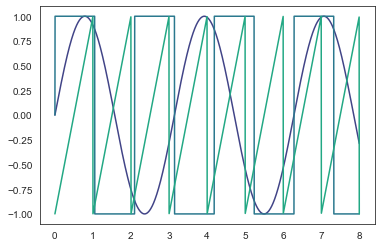

In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import seaborn as sns

# basic setup for the experiment
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

# create 3 different signals
signal_1 = np.sin(2 * time)                    # sinusoidal signal
signal_2 = np.sign(np.sin(3 * time))           # square signal
signal_3 = signal.sawtooth(2 * np.pi * time)   # saw tooth signal

# create a signals matrix
signals = np.array([signal_1, signal_2, signal_3])

# plot the original signals
sns.set_style('white')
sns.set_palette('viridis', 4)
for signal in signals:
    sns.lineplot(x=time, y=signal)

# show figure and save
plt.savefig('figures/original_signals.png', dpi=200)
plt.show()

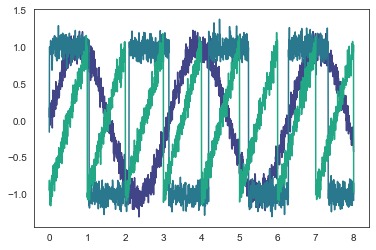

In [2]:
# add noise to the data and visualize it
noisy_signals = signals + 0.1 * np.random.normal(size=signals.shape)
for signal in noisy_signals:
    sns.lineplot(x=time, y=signal)

plt.show()

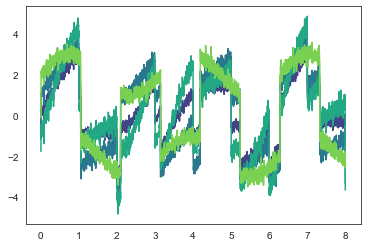

In [3]:
# mix data using a matrix
mixing_matrix = np.array([[1.0, 1.0, 1.0],
                          [0.5, 2.0, 1.0],
                          [1.5, 1.0, 2.0],
                          [1.0, 2.0, 0.0]])

# matrix multiplication
observations = mixing_matrix @ noisy_signals

# plot the observations
for signal in observations:
    sns.lineplot(x=time, y=signal)

plt.show()

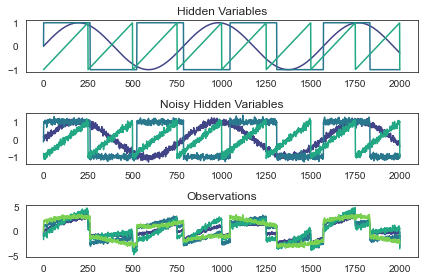

In [4]:
plt.figure()

models = [signals, noisy_signals, observations]
names = [
    "Hidden Variables",
    "Noisy Hidden Variables",
    "Observations",
]

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(3, 1, ii)
    plt.title(name)
    for sig in model:
        plt.plot(sig)

plt.tight_layout()

# show figure and save
plt.savefig('figures/cocktail_party_problem.png', dpi=200)
plt.show()

In [5]:
def relu(x):
    return x * (x > 0)

non_linear_observations = np.array([np.sin(noisy_signals[0]) + np.tanh(noisy_signals[1] + np.exp(noisy_signals[2])),
                                   relu(noisy_signals[0]) + np.cos(noisy_signals[1] + np.tanh(noisy_signals[2])),
                                   np.exp(noisy_signals[0]) + relu(noisy_signals[1] + np.sin(noisy_signals[2])),
                                   np.tanh(noisy_signals[0]) + np.exp(noisy_signals[1] + relu(noisy_signals[2]))])

non_linear_observations.shape

(4, 2000)

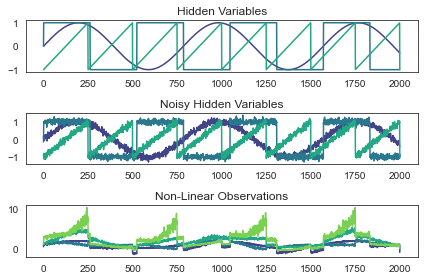

In [6]:
plt.figure()

models = [signals, noisy_signals, non_linear_observations]
names = [
    "Hidden Variables",
    "Noisy Hidden Variables",
    "Non-Linear Observations",
]

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(3, 1, ii)
    plt.title(name)
    for sig in model:
        plt.plot(sig)

plt.tight_layout()

# show figure and save
plt.savefig('figures/non_linear_cocktail_party.png', dpi=200)
plt.show()